<a href="https://colab.research.google.com/github/PratibhaSanganmath/ML-Online-Retail-Customer-segmentation/blob/main/Online_Retail_Customer_Segmentation_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## Importing Libraries

In [1]:
#Load all the required packages
import pandas as pd
import numpy as np
import time
import datetime
from time import mktime
from datetime import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## IMPORTING DATASET:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#file path
file_path='/content/drive/MyDrive/Unsupervised ML:Online Retail Customer Segmentation/Online Retail.xlsx'

In [4]:
#file path
dfRetail=pd.read_excel(file_path)

# Analysing Dataset

In [5]:
dfRetail.head() # #Pandas head() method is used to return top n (5 by default) rows of a data frame 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
dfRetail.tail()  ##Pandas tail() method is used to return last n (5 by default) rows of a data frame 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
dfRetail.shape   # Shape of a dataframe gets the number of rows and number of columns of the dataframe

(541909, 8)

In [8]:
dfRetail.info() #getting information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
dfRetail.columns #to get all the column names present in the dataset

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
#shifting columns
dfRetail = dfRetail[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice']]

In [11]:
dfRetail.head()#getting top 5 rows

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [12]:
# Copy the Dataframe in case we mess up something
df = dfRetail.copy()

In [13]:
df.describe() #Use describe to compute some summary statistics on the DataFrame.

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,9.552250,4.611114
std,1713.600303,218.081158,96.759853
min,12346.000000,-80995.000000,-11062.060000
25%,13953.000000,1.000000,1.250000
50%,15152.000000,3.000000,2.080000
75%,16791.000000,10.000000,4.130000
max,18287.000000,80995.000000,38970.000000


In [14]:
# Stats from Data Frame in case od Object Datatype
df.describe(include=['O'])

,InvoiceNo,StockCode,Country,Description
count,541909,541909,541909,540455
unique,25900,4070,38,4223
top,573585,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2313,495478,2369


## Handling null values

In [15]:
# Drop Duplicated rows of data from the DataFrame, It happened because of Human Error..!! :-p
print("*"*75)
print("Length of DataFrame with duplicate values : ", len(df))
df.drop_duplicates(inplace=True, keep='first')
print("*"*75)
print("Length of DataFrame after dropping all the duplicate values : ", len(df))
print("*"*75)

***************************************************************************
Length of DataFrame with duplicate values :  541909
***************************************************************************
Length of DataFrame after dropping all the duplicate values :  536641
***************************************************************************


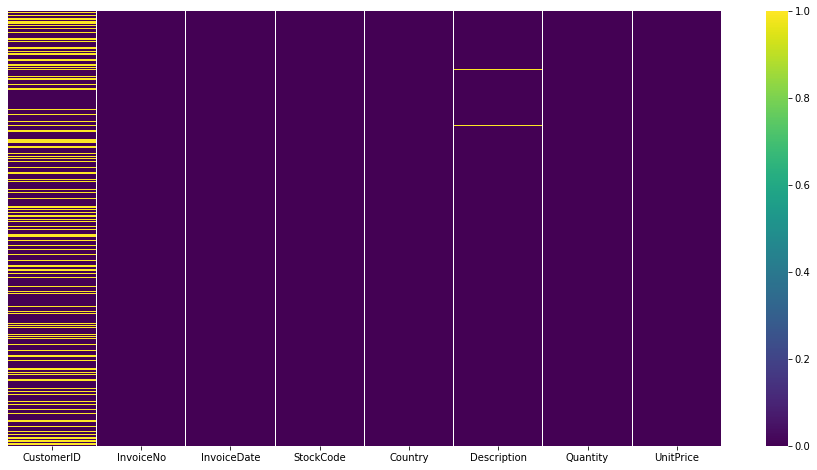

In [16]:
#plotting graph
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

OBSERVATION:

Here shining yellow lines are null values.

In [17]:
# Creating a defination for checking missing values
def mdF():
  total_no=df.isnull().sum()
  missing_percentage=(df.isnull().sum()/len(df))*100
  mdF= pd.concat([total_no,missing_percentage],keys=['missing_Values','Missing_percentage'],axis=1)
  return mdF[mdF['missing_Values']>1]

In [18]:
mdF

<function __main__.mdF>

In [19]:
mdF()

,missing_Values,Missing_percentage
CustomerID,135037,25.163377
Description,1454,0.270945



Drop the entries where both the CustomerID and Description are null values.

In [20]:
# Drop the entries where both the CustomerID and Description are null values.
df.drop(index=df[df['CustomerID'].isna() & df['Description'].isna()].index, inplace=True)

In [21]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [22]:
#getting columns
df.columns

Index(['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country',
       'Description', 'Quantity', 'UnitPrice'],
      dtype='object')

In [23]:
mdF()

,missing_Values,Missing_percentage
CustomerID,133583,24.960061


# The Major Concept is to identify the Customer Categories, situation cannot proceed further with Missing Customer ID's.

In [24]:
# The Major Concept is to identify the Customer Categories, situation cannot proceed further with Missing Customer ID's
# Drop the null values in customer ID field
df.dropna(inplace=True)

In [25]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   401604 non-null  float64       
 1   InvoiceNo    401604 non-null  object        
 2   InvoiceDate  401604 non-null  datetime64[ns]
 3   StockCode    401604 non-null  object        
 4   Country      401604 non-null  object        
 5   Description  401604 non-null  object        
 6   Quantity     401604 non-null  int64         
 7   UnitPrice    401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [26]:
#describing
df.describe()

,CustomerID,Quantity,UnitPrice
count,401604.000000,401604.000000,401604.000000
mean,15281.160818,12.183273,3.474064
std,1714.006089,250.283037,69.764035
min,12346.000000,-80995.000000,0.000000
25%,13939.000000,2.000000,1.250000
50%,15145.000000,5.000000,1.950000
75%,16784.000000,12.000000,3.750000
max,18287.000000,80995.000000,38970.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


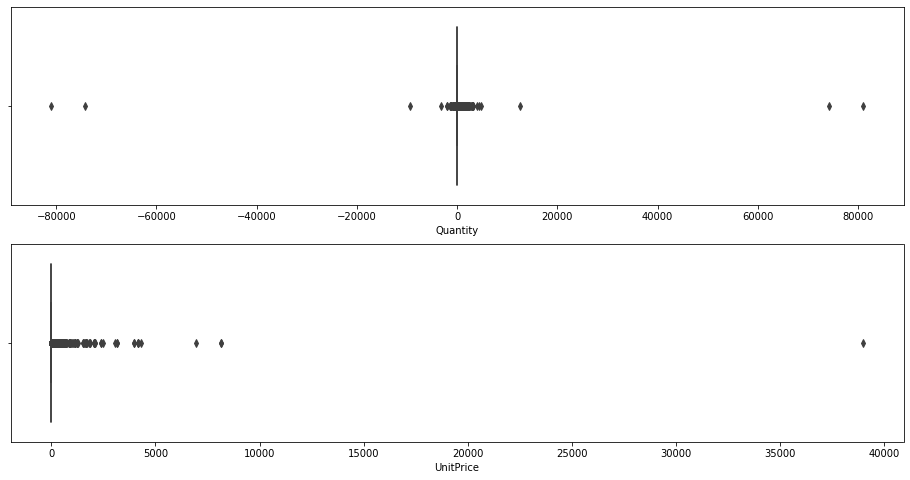

In [27]:
#plotting graph
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

# Quantity & Unit Price should never be negative & not equals to Zero:

In [28]:
# Quantity & Unit Price should never be negative & not equals to Zero
# Grab the data frame where both the fields are positive in nature
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
print("Length of Dataframe is : ",len(df))

Length of Dataframe is :  392692


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


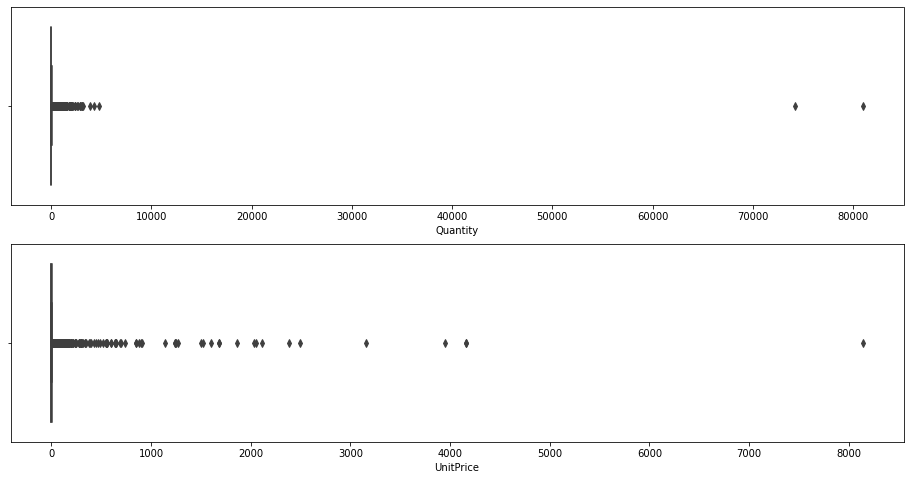

In [29]:
#plotting graph
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [32]:
#so from the above graph we can see that we have got all the positive values for quantity and unitprice

df['CustomerID'].dtype # checking the type of the customerID

dtype('float64')

In [ ]:
# let us convert our customerID datatype into integer using lamda 

In [34]:
df['CustomerID'] = df['CustomerID'].apply(lambda x: int(x))

In [35]:
# now let us check our datatype of customerID again
df['CustomerID'].dtype

dtype('int64')

In [36]:
# creating a new column called Total_price
df['Total_Price'] = df['Quantity']*df['UnitPrice']

In [37]:
# now our dataset contains new column called total_price
df.head() # returns the first 5 rows

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [38]:
# we have invoicedate column which has year,month,day,and time 
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
# so now we are going to extract year,month,day,and time from invoicedate using lamda fuc

In [39]:
year = df['InvoiceDate'].apply(lambda x: x.year)
month = df['InvoiceDate'].apply(lambda x: x.month)
weekday = df['InvoiceDate'].apply(lambda x: x.weekday())
time_hr = df['InvoiceDate'].apply(lambda x: x.time().hour)
minutes_hr = df['InvoiceDate'].apply(lambda x: x.time().minute)

In [40]:
# now let us check the length of the variable that we have created
len(year), len(month), len(weekday), len(time_hr), len(minutes_hr)

(392692, 392692, 392692, 392692, 392692)

In [41]:
# so let us convert month and date into categorical values

monthDict={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
           7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'} # converting month number into month name
month = month.map(monthDict)

In [42]:

day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'} # converting date number into day name
weekday = weekday.map(day)

In [43]:
#creating function to seperate morning afternoon and evening
def Period(x):
    if 6 <= x < 12:
        return 'Morning'
    elif 12 <= x < 16:
        return 'Afternoon'
    elif 16<= x <= 20:
        return 'Evening'

In [44]:
# creating some columns & fetching the data that we have created already
df['Year'] = year
df['Month'] = month
df['WeekDay'] = weekday
df['TimePeriod'] = time_hr
df['TimePeriod'] = df['TimePeriod'].apply(lambda x: Period(x)) # already we created function ,so applying that function here using lamda ,

In [45]:
# let us check the columns that we have created
df.head() # returns the first 5 rows of the dataset

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Year,Month,WeekDay,TimePeriod
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,December,Wednesday,Morning
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,December,Wednesday,Morning
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,December,Wednesday,Morning
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,December,Wednesday,Morning
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,December,Wednesday,Morning


In [46]:
# again we are going to shift our columns
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Year', 'Month', 'WeekDay','TimePeriod',
         'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice', 'Total_Price']]

In [47]:
# now let us check our dataset
df.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [48]:
#copying our dataset into my_data
my_data = df.copy()

In [49]:
my_data.head() # returns the first 5 rows of the dataset

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [50]:
my_data.info() #getting information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   392692 non-null  int64         
 1   InvoiceNo    392692 non-null  object        
 2   InvoiceDate  392692 non-null  datetime64[ns]
 3   Year         392692 non-null  int64         
 4   Month        392692 non-null  object        
 5   WeekDay      392692 non-null  object        
 6   TimePeriod   392692 non-null  object        
 7   StockCode    392692 non-null  object        
 8   Country      392692 non-null  object        
 9   Description  392692 non-null  object        
 10  Quantity     392692 non-null  int64         
 11  UnitPrice    392692 non-null  float64       
 12  Total_Price  392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 41.9+ MB


In [51]:
my_data.describe() # returns the numerical columns and its basic calculation

,CustomerID,Year,Quantity,UnitPrice,Total_Price
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,15287.843865,2010.934631,13.119702,3.125914,22.631500
std,1713.539549,0.247177,180.492832,22.241836,311.099224
min,12346.000000,2010.000000,1.000000,0.001000,0.001000
25%,13955.000000,2011.000000,2.000000,1.250000,4.950000
50%,15150.000000,2011.000000,6.000000,1.950000,12.450000
75%,16791.000000,2011.000000,12.000000,3.750000,19.800000
max,18287.000000,2011.000000,80995.000000,8142.750000,168469.600000


In [52]:
my_data.describe(include=['O']) # returns the categorical columns and its basic counts

,InvoiceNo,Month,WeekDay,TimePeriod,StockCode,Country,Description
count,392692,392692,392692,392692,392692,392692,392692
unique,18532,12,6,3,3665,37,3877
top,576339,November,Thursday,Afternoon,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,542,63168,79243,231998,2023,349203,2016


Best Customers

Best Customers are the ones who have paid more to the company/service and continuously purchasing the products

##**Top 30 Customers of our Retail Chain are:**

In [53]:
# returns the top 30 customer id's who have high price rate
best_customers = my_data.groupby(by='CustomerID')['Total_Price'].sum().sort_values(ascending=False)[:30]
best_customers

CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
16684     66653.56
14096     65164.79
13694     65039.62
15311     60632.75
13089     58762.08
17949     58510.48
15769     56252.72
15061     54534.14
14298     51527.30
14088     50491.81
15749     44534.30
12931     42055.96
17841     40519.84
15098     39916.50
13798     37153.85
16013     37130.60
16422     34684.40
15838     33643.08
12748     33053.19
17404     31906.82
Name: Total_Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


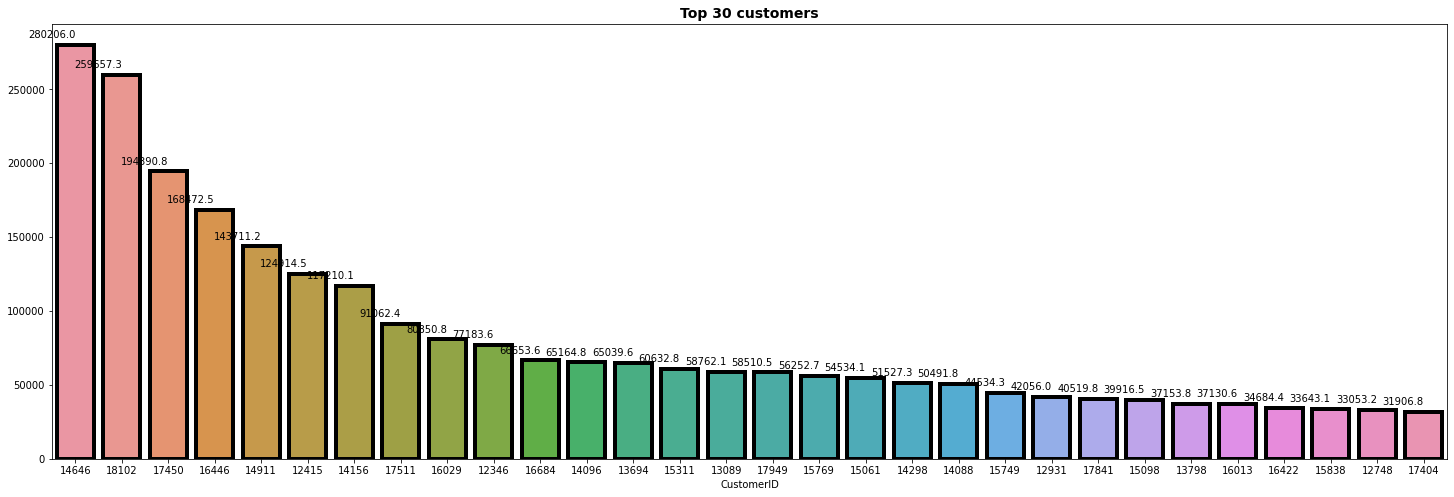

In [54]:
# Here, we plot the bar plot
plt.figure(figsize=(55,8))
plt.subplot(1,2,1)
ax=sns.barplot(best_customers.index, best_customers.values, order=best_customers.index,lw=4,
               ec='black',hatch='')
plt.title("Top 30 customers", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')